In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('accident.csv')
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [67]:
df.shape

(200, 6)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [69]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [70]:
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

In [71]:
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [72]:
df[df['Gender'].isna()]

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
30,66,NaN,72.0,No,Yes,0


In [73]:
df[df['Speed_of_Impact'].isna()]

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
15,41,Female,NaN,No,No,0
19,41,Male,NaN,Yes,No,1
29,42,Male,NaN,Yes,No,0


There are null values. To handle this, we could drop them by writing the line, `df.dropna(inplace=True)`. I don't want to do this because that results in me losing data and the dataset is already relatively small with only 200 rows. To avoid removing this data, we can perform imputation.

In [74]:
print("Unique Values:", df['Gender'].unique())
print("Value Counts:", df['Gender'].value_counts())

mode_gender = df['Gender'].mode()
print("\nMode:", mode_gender[0], "\n")

df['Gender'].fillna(mode_gender[0],inplace=True)

Unique Values: ['Female' 'Male' nan]
Value Counts: Gender
Female    110
Male       89
Name: count, dtype: int64

Mode: Female 



In [75]:
df.iloc[30]

,30
Age,66
Gender,Female
Speed_of_Impact,72.0
Helmet_Used,No
Seatbelt_Used,Yes
Survived,0


In [89]:
print("Unique Values:", df['Speed_of_Impact'].unique())
print("\nValue Counts:", df['Speed_of_Impact'].value_counts())

print('\n')
print("Mean:", df['Speed_of_Impact'].mean())
print("Median:", df['Speed_of_Impact'].median())
print("Mode:", df['Speed_of_Impact'].mode()[0])

median_imputation = df['Speed_of_Impact'].median()
df['Speed_of_Impact'].fillna(median_imputation, inplace=True)

Unique Values: [ 27.  46. 117.  40.  49. 116.  47.  83.  88.  80.  67.  38.  23.  71.
  68.  36. 111. 112.  65.  25. 118.  56.  43.  72. 114.  79.  82. 104.
  51. 106.  52.  86.  37.  44.  73.  77.  66. 105.  42.  85.  21. 109.
  28.  62.  58.  61.  45.  69.  32.  26.  76.  55.  64.  39.  84.  35.
  33.  95.  34.  70.  81.  41.  89.  24.  87. 115. 113.  74.  59.  31.
  20.  53. 108.  48.  97. 119.  29.  99. 110. 103.]

Value Counts: Speed_of_Impact
77.0     7
88.0     6
35.0     6
71.0     6
111.0    5
        ..
64.0     1
55.0     1
26.0     1
69.0     1
103.0    1
Name: count, Length: 80, dtype: int64


Mean: 70.45
Median: 71.0
Mode: 77.0


In [90]:
df.iloc[[15, 19, 29]]

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
15,41,Female,71.0,No,No,0
19,41,Male,71.0,Yes,No,1
29,42,Male,71.0,Yes,No,0


In [91]:
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [92]:
df.duplicated().sum()

0

There were no duplicated values. That's nice since that means we won't have to drop any duplicate values. Duplicated values are useless for our model and only a redundant waste of computation. Therefore, they are usually removed using the line, `df.drop_duplicates(inplace=True)`.

In [93]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


The algorithm can understand numerical values, but it cannot understand strings or objects in this case. Therefore, we need to perform feature engineering to replace objects of string type to plain numerical values or numerical values in a numpy array.

In [98]:
print("Helmet_Used Unique Values:",df['Helmet_Used'].unique())
print("Helmet_Used Value Counts:",df['Helmet_Used'].value_counts(), '\n')
print('Seatbelt_Used Unique Values:',df['Seatbelt_Used'].unique())
print('Seatbelt_Used Value Counts:',df['Seatbelt_Used'].value_counts())

Helmet_Used Unique Values: ['No' 'Yes']
Helmet_Used Value Counts: Helmet_Used
Yes    111
No      89
Name: count, dtype: int64 

Seatbelt_Used Unique Values: ['No' 'Yes']
Seatbelt_Used Value Counts: Seatbelt_Used
Yes    111
No      89
Name: count, dtype: int64


In [99]:
df['Helmet_Used'] = df['Helmet_Used'].map({'Yes':1,'No':0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes':1,'No':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0
...,...,...,...,...,...,...
195,69,0,111.0,0,1,1
196,30,0,51.0,0,1,1
197,58,1,110.0,0,1,1
198,20,1,103.0,0,1,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    int64  
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    int64  
 4   Seatbelt_Used    200 non-null    int64  
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


<Axes: >

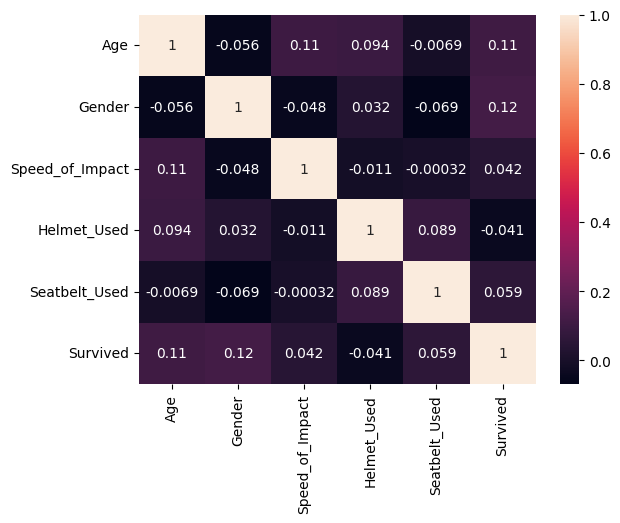

In [102]:
sns.heatmap(df.corr(),annot=True)

In [104]:
X = df[['Speed_of_Impact','Helmet_Used','Age','Gender']]
y = df['Survived']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (160, 4)
X_test Shape: (40, 4)
y_train Shape: (160,)
y_test Shape: (40,)


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

lg.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

lg_pred = lg.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)

lg_acc = accuracy_score(y_test, lg_pred)
dt_acc = accuracy_score(y_test, dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print("Logistic Regression Accuracy:", lg_acc)
print("Decision Tree Accuracy:", dt_acc)
print("K-Nearest Neighbors Accuracy:", knn_acc)

Logistic Regression Accuracy: 0.55
Decision Tree Accuracy: 0.525
K-Nearest Neighbors Accuracy: 0.525
